In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Desktop\Dataset.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe(percentiles=[0.10,0.25,0.35,0.75,0.85,0.90,0.95,0.99]).round(2)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00,3333.00,3333.0,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,0.14,101.06,0.9,0.28,0.82,1.56,179.78,100.44,56.31,10.05,10.24
std,0.35,39.82,0.3,0.45,1.27,1.32,54.47,20.07,16.43,2.54,2.79
min,0.00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00
10%,0.00,50.00,1.0,0.00,0.00,0.00,110.32,74.20,38.00,6.84,6.70
25%,0.00,74.00,1.0,0.00,0.00,1.00,143.70,87.00,45.00,8.33,8.50
35%,0.00,86.00,1.0,0.00,0.00,1.00,157.92,93.00,48.00,9.03,9.30
50%,0.00,101.00,1.0,0.00,0.00,1.00,179.40,101.00,53.50,10.07,10.30
75%,0.00,127.00,1.0,1.00,1.78,2.00,216.40,114.00,66.20,11.77,12.10
85%,0.00,142.00,1.0,1.00,2.70,3.00,236.30,121.00,75.20,12.71,13.00


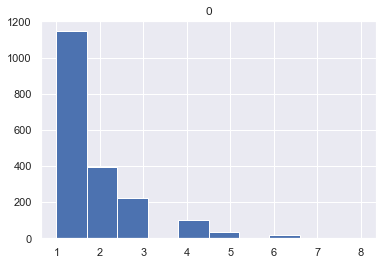

In [6]:
c=df.groupby(['Churn','DayMins']).size().to_frame()
c.hist(bins=10);

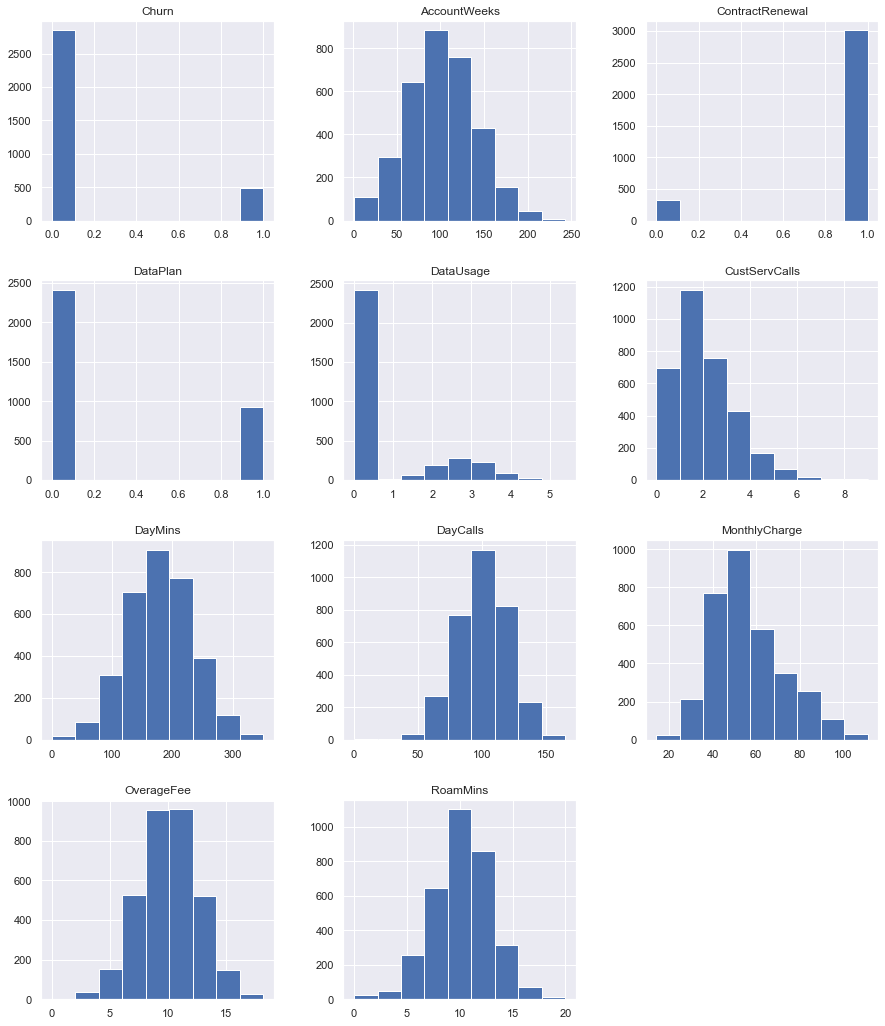

In [7]:
df.hist(bins=9,figsize=(15,18));

In [8]:
df['OverageFee'].max()

18.19

In [9]:
df.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

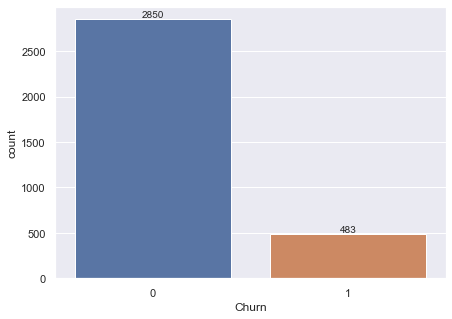

In [10]:
#this is a imbalance
plt.figure(figsize=(7,5))
r=sns.countplot(x='Churn',data=df)
for i in r.containers:
    r.bar_label(i)

In [11]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

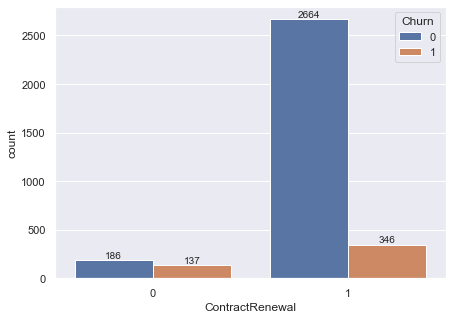

In [12]:
plt.figure(figsize=(7,5))
r=sns.countplot(x='ContractRenewal',hue='Churn',data=df)
for i in r.containers:
    r.bar_label(i)

In [13]:
df['ContractRenewal'].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

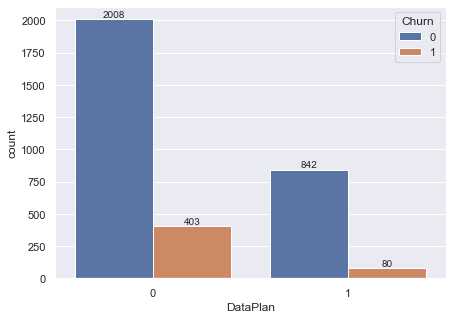

In [14]:
plt.figure(figsize=(7,5))
r=sns.countplot(x='DataPlan',hue='Churn',data=df)
for i in r.containers:
    r.bar_label(i)

In [15]:
df['DataPlan'].value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

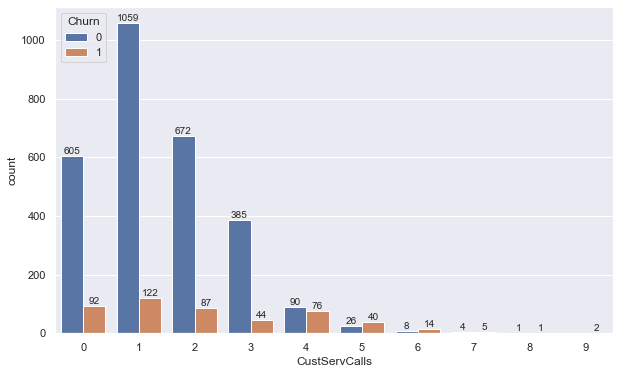

In [16]:
plt.figure(figsize=(10,6))
r=sns.countplot(x='CustServCalls',hue='Churn',data=df)
for i in r.containers:
     r.bar_label(i)

In [17]:
df['CustServCalls'].value_counts(normalize=True).round(2)*100

1    35.0
2    23.0
0    21.0
3    13.0
4     5.0
5     2.0
6     1.0
7     0.0
9     0.0
8     0.0
Name: CustServCalls, dtype: float64

In [18]:
df['CustServCalls'].max()

9

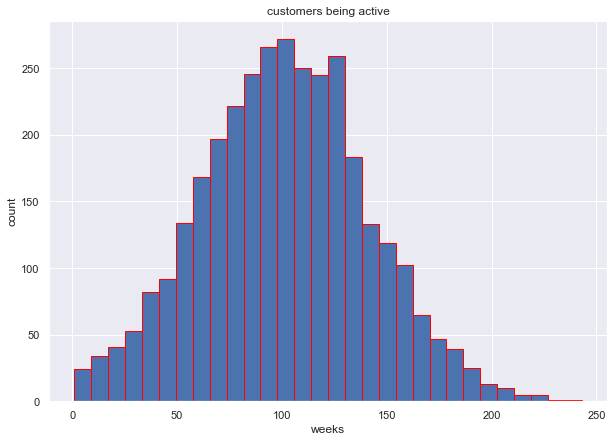

In [19]:
plt.figure(figsize=(10,7))
plt.hist(df['AccountWeeks'],edgecolor='red',bins=30)
plt.xlabel('weeks')
plt.ylabel('count')
plt.title('customers being active')
plt.show()

In [20]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [21]:
pie=df['Churn'].value_counts(normalize=True).round(3)*100
pie

0    85.5
1    14.5
Name: Churn, dtype: float64

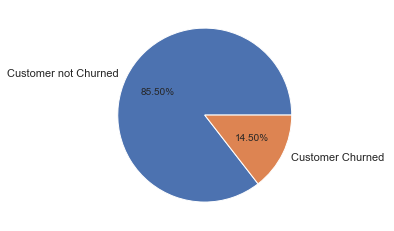

In [22]:
# Churn or Not_Churn
plt.pie(pie,labels=['Customer not Churned','Customer Churned '],autopct='%.2f%%');

In [23]:
pie1=df['ContractRenewal'].value_counts(normalize=True).round(3)*100
pie1

1    90.3
0     9.7
Name: ContractRenewal, dtype: float64

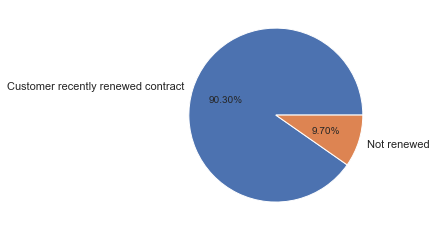

In [24]:
# Contact Renewal
plt.pie(pie1,labels=['Customer recently renewed contract','Not renewed'],autopct='%1.2f%%');

In [25]:
pie2=df['DataPlan'].value_counts(normalize=True).round(3)*100
pie2

0    72.3
1    27.7
Name: DataPlan, dtype: float64

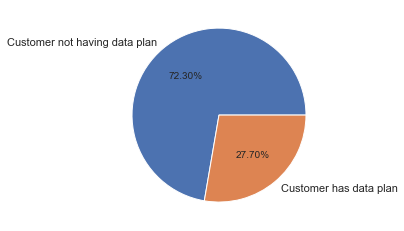

In [26]:
# Data Plan
plt.pie(pie2,labels=['Customer not having data plan','Customer has data plan'],autopct='%1.2f%%');

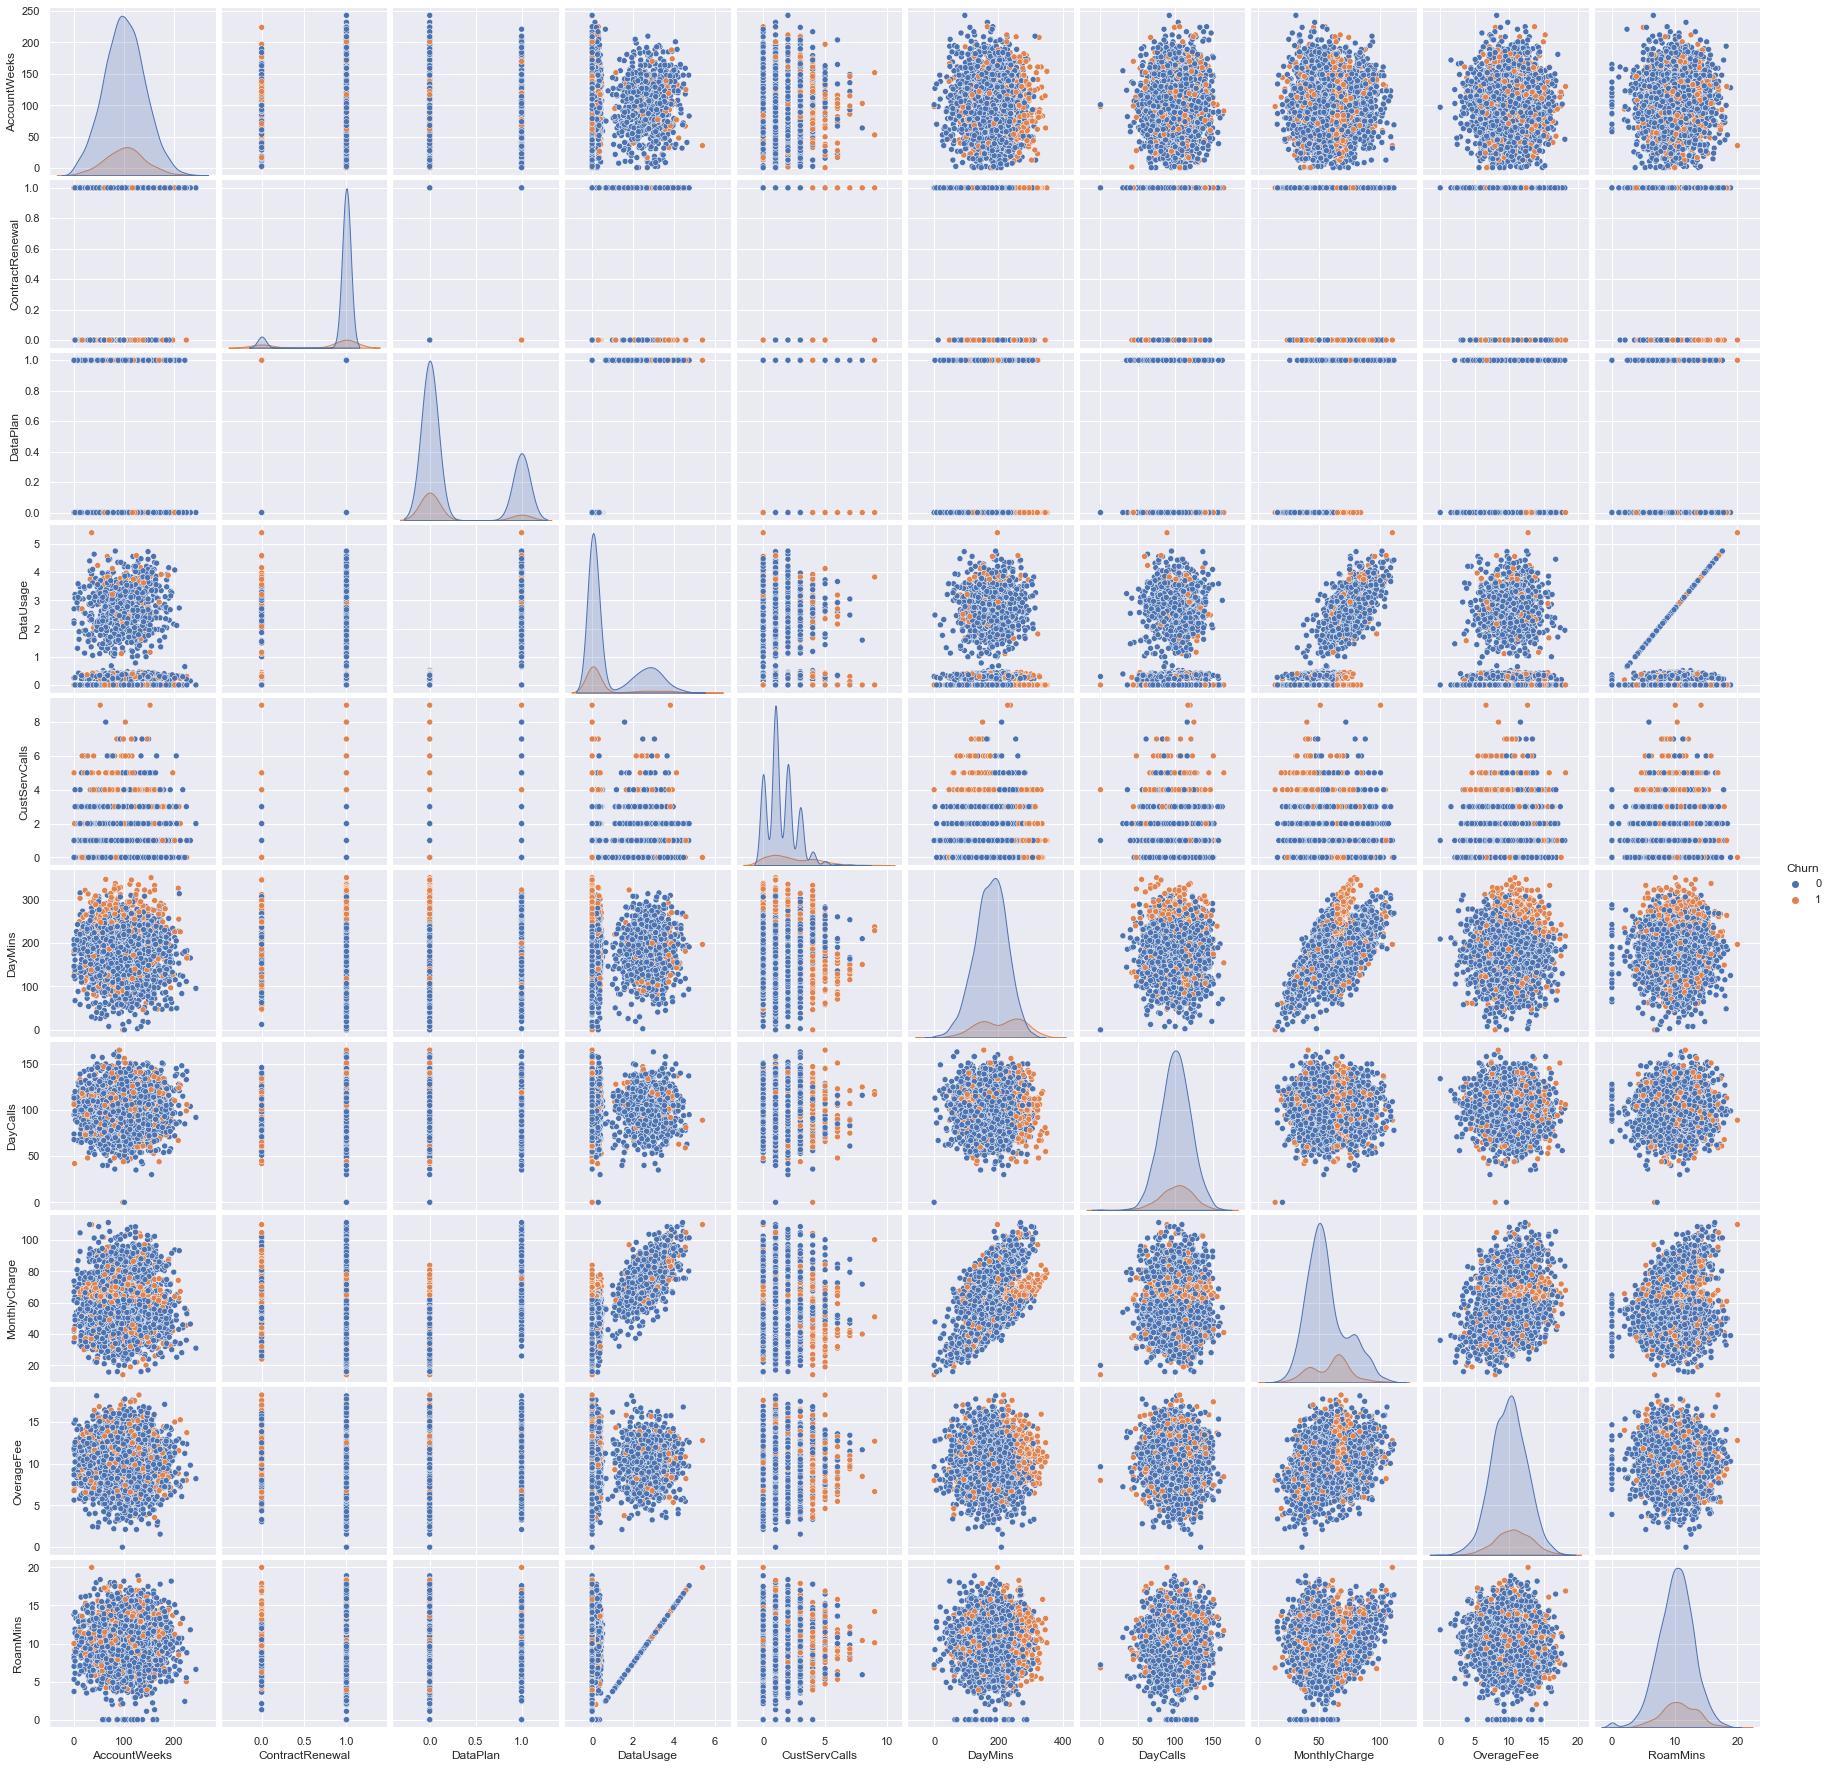

In [27]:
sns.pairplot(df,hue='Churn');

# Outliers

# Outliers

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Churn               0.00
AccountWeeks       53.00
ContractRenewal     0.00
DataPlan            1.00
DataUsage           1.78
CustServCalls       1.00
DayMins            72.70
DayCalls           27.00
MonthlyCharge      21.20
OverageFee          3.44
RoamMins            3.60
dtype: float64


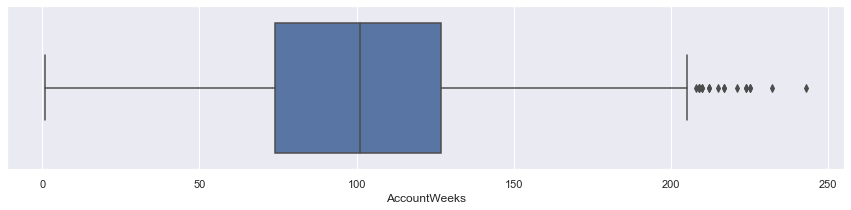

In [29]:
plt.figure(figsize=(15,3))
sns.boxplot(df['AccountWeeks']);

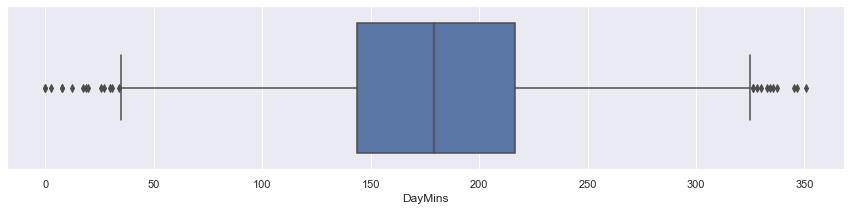

In [30]:
plt.figure(figsize=(15,3))
sns.boxplot(df['DayMins']);

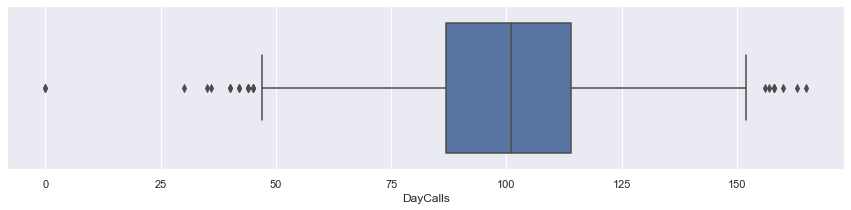

In [31]:
plt.figure(figsize=(15,3))
sns.boxplot(df['DayCalls']);

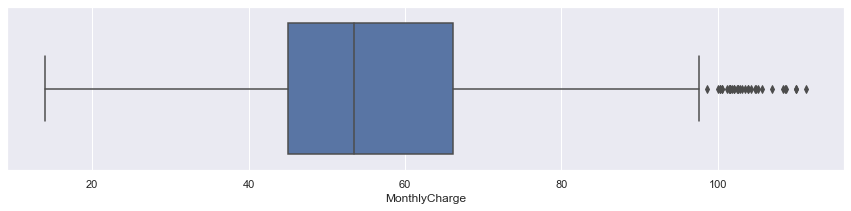

In [32]:
plt.figure(figsize=(15,3))
sns.boxplot(df['MonthlyCharge']);

# Detecting the Outliers

In [33]:
# # The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, 
# is a measure of statistical dispersion, 
# being equal to the difference between 75th and 25th percentiles, 
# or between upper and lower quartiles, IQR = Q3 − Q1.

In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Churn               0.00
AccountWeeks       53.00
ContractRenewal     0.00
DataPlan            1.00
DataUsage           1.78
CustServCalls       1.00
DayMins            72.70
DayCalls           27.00
MonthlyCharge      21.20
OverageFee          3.44
RoamMins            3.60
dtype: float64


In [35]:
# Account Weeks
q1=df['AccountWeeks'].quantile(0.25)
q3=df['AccountWeeks'].quantile(0.75)
print(q1,q3)
iqr=q3-q1

74.0 127.0


In [36]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print('Lower Limit--> ',lower_limit)
print('Upper Limit--> ',upper_limit)

Lower Limit-->  -5.5
Upper Limit-->  206.5


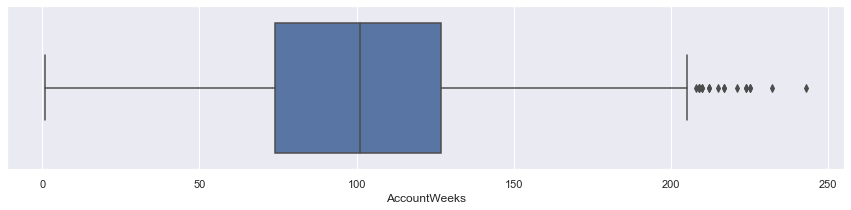

In [37]:
#Before Adjusting Outliers
plt.figure(figsize=(15,3))
sns.boxplot(df['AccountWeeks']);

In [38]:
df['AccountWeeks']=np.where(df['AccountWeeks']>207,207,df['AccountWeeks'])

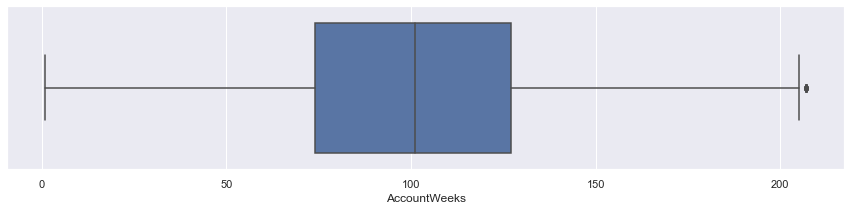

In [39]:
# After Adjusting Outliers
plt.figure(figsize=(15,3))
sns.boxplot(df['AccountWeeks']);

In [40]:
q1_1=df['DayMins'].quantile(0.25)
q3_1=df['DayMins'].quantile(0.75)
print(q1_1,q3_1)
iqr_1=q3_1-q1_1

143.7 216.4


In [41]:
lower_limit_1=q1_1-1.5*iqr_1
upper_limit_1=q3_1+1.5*iqr_1
print('Lower Limit--> ',lower_limit_1)
print('Upper Limit--> ',upper_limit_1)

Lower Limit-->  34.64999999999996
Upper Limit-->  325.45000000000005


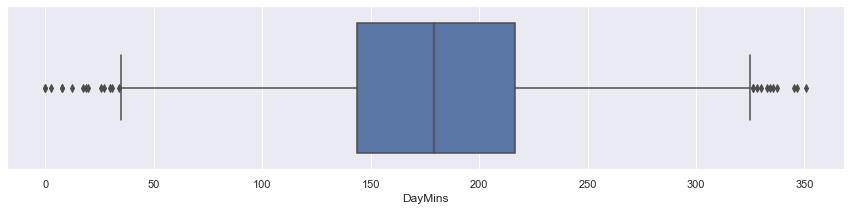

In [42]:
#Before Adjusting Outliers
plt.figure(figsize=(15,3))
sns.boxplot(df['DayMins']);

In [43]:
df['DayMins']=np.where(df['DayMins']<35,35,df['DayMins'])
df['DayMins']=np.where(df['DayMins']>326,326,df['DayMins'])

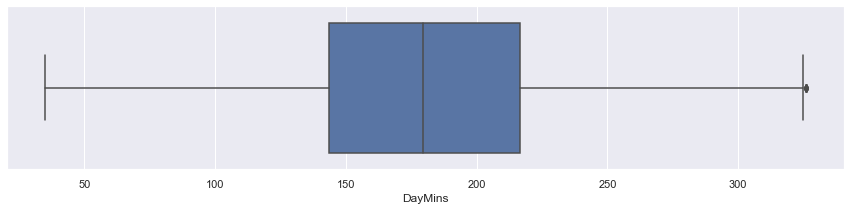

In [44]:
#After Adjusting Outliers
plt.figure(figsize=(15,3))
sns.boxplot(df['DayMins']);

In [45]:
q1_2=df['DayCalls'].quantile(0.25)
q3_2=df['DayCalls'].quantile(0.75)
print(q1_2,q3_2)
iqr_2=q3_2-q1_2

87.0 114.0


In [46]:
lower_limit_2=q1_2-1.5*iqr_2
upper_limit_2=q3_2+1.5*iqr_2
print('Lower Limit--> ',lower_limit_2)
print('Upper Limit--> ',upper_limit_2)

Lower Limit-->  46.5
Upper Limit-->  154.5


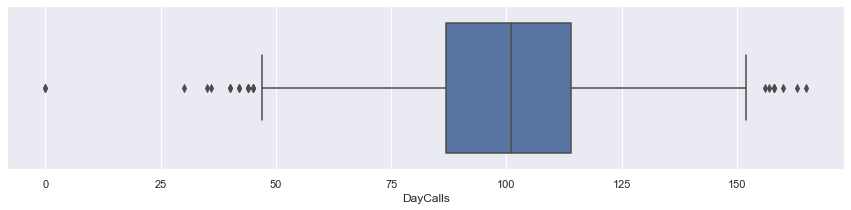

In [47]:
#Before Adjusting Outliers
plt.figure(figsize=(15,3))
sns.boxplot(df['DayCalls']);

In [48]:
df['DayCalls']=np.where(df['DayCalls']<47,47,df['DayCalls'])
df['DayCalls']=np.where(df['DayCalls']>155,155,df['DayCalls'])

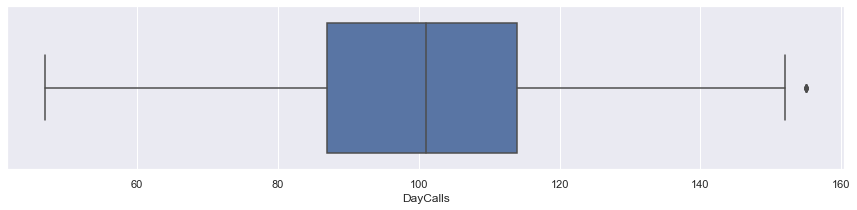

In [49]:
# After Adjusting Outliers
plt.figure(figsize=(15,3))
sns.boxplot(df['DayCalls']);

In [50]:
q1_3=df['MonthlyCharge'].quantile(0.25)
q3_3=df['MonthlyCharge'].quantile(0.75)
print(q1_3,q3_3)
iqr_3=q3_3-q1_3

45.0 66.2


In [51]:
lower_limit_3=q1_3-1.5*iqr_3
upper_limit_3=q3_3+1.5*iqr_3
print('Lower Limit--> ',lower_limit_3)
print('Upper Limit--> ',upper_limit_3)

Lower Limit-->  13.199999999999996
Upper Limit-->  98.0


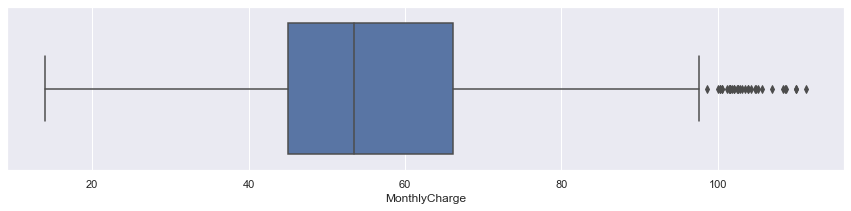

In [52]:
# Before Adjusting Outliers
plt.figure(figsize=(15,3))
sns.boxplot(df['MonthlyCharge']);

In [53]:
df['MonthlyCharge']=np.where(df['MonthlyCharge']> 99,99,df['MonthlyCharge'])

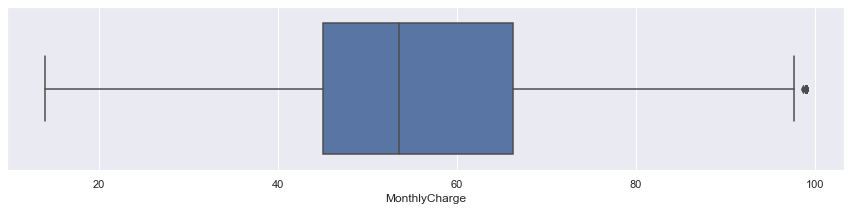

In [54]:
# After Adjusting Outliers
plt.figure(figsize=(15,3))
sns.boxplot(df['MonthlyCharge']);

In [55]:
df.groupby('Churn').mean()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,,,,,,,,,,
0,100.740000,0.934737,0.295439,0.862151,1.449825,175.253123,100.314386,55.771825,9.954618,10.158877
1,102.575569,0.716356,0.165631,0.546957,2.229814,206.763561,101.436853,59.118012,10.623085,10.700000


# Correlation

<AxesSubplot:>

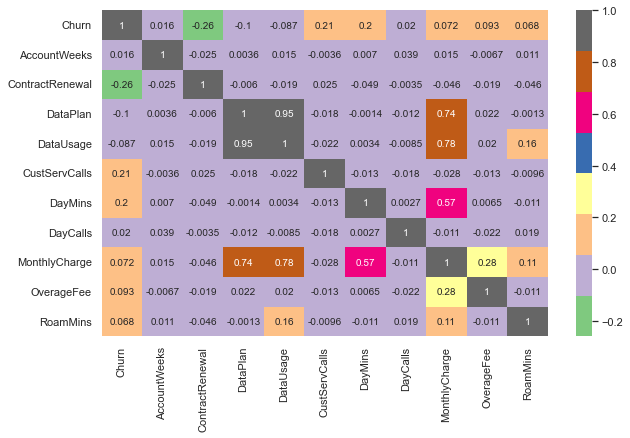

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Accent')

# Logistic

In [57]:
X=df.iloc[:,1:].values
y=df['Churn']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = log.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(log.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86


# Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[703  15]
 [ 98  18]]


# Performance on Train

In [61]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
y_train_predict=log.predict(X_train)
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2132
           1       0.48      0.17      0.25       367

    accuracy                           0.85      2499
   macro avg       0.67      0.57      0.58      2499
weighted avg       0.81      0.85      0.82      2499



In [62]:
confusion_matrix(y_train,y_train_predict)

array([[2064,   68],
       [ 305,   62]], dtype=int64)

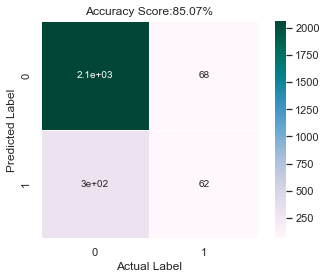

In [63]:
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,cmap='PuBuGn',linewidths=.5,square=True)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Accuracy Score:"+str(round(log.score(X_train,y_train)*100,2))+'%')
plt.show()

# Performance on Test

In [64]:
y_test_predict=log.predict(X_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       718
           1       0.55      0.16      0.24       116

    accuracy                           0.86       834
   macro avg       0.71      0.57      0.58       834
weighted avg       0.83      0.86      0.83       834



In [65]:
confusion_matrix(y_test,y_test_predict)

array([[703,  15],
       [ 98,  18]], dtype=int64)

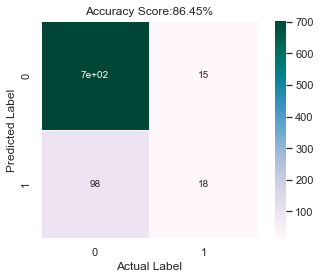

In [66]:
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True,cmap='PuBuGn',linewidths=.5,square=True)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Accuracy Score:"+str(round(log.score(X_test,y_test)*100,2))+'%')
plt.show()

# Comparing the Models

In [67]:
def compare_train_test(models):
    y_train_predict=log.predict(X_train)
    y_test_predict=log.predict(X_test)
    cr_train=classification_report(y_train,y_train_predict)
    cr_test=classification_report(y_test,y_test_predict)
    print(models.score(X_train,y_train).round(2),cr_train,'\n',models.score(X_test,y_test).round(2),cr_test,'\n')
compare_train_test(log)

0.85               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2132
           1       0.48      0.17      0.25       367

    accuracy                           0.85      2499
   macro avg       0.67      0.57      0.58      2499
weighted avg       0.81      0.85      0.82      2499
 
 0.86               precision    recall  f1-score   support

           0       0.88      0.98      0.93       718
           1       0.55      0.16      0.24       116

    accuracy                           0.86       834
   macro avg       0.71      0.57      0.58       834
weighted avg       0.83      0.86      0.83       834
 



# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
ypred=model1.predict(X_test)
print("Accuracy Score:{:.2f}".format(model1.score(X_test,y_test)))

Accuracy Score:0.89


# Performance on Train

In [70]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
y_trainpredict=model1.predict(X_train)
print(classification_report(y_train,y_trainpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00       367

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



In [71]:
confusion_matrix(y_train,y_trainpredict)

array([[2132,    0],
       [   0,  367]], dtype=int64)

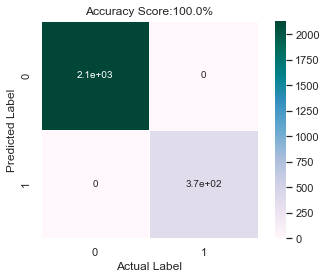

In [72]:
sns.heatmap(confusion_matrix(y_train,y_trainpredict),annot=True,cmap='PuBuGn',linewidths=.5,square=True)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Accuracy Score:"+str(round(model1.score(X_train,y_train)*100,2))+'%')
plt.show()

# Performance on Test

In [73]:
y_testpredict=model1.predict(X_test)
print(classification_report(y_test,y_testpredict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       718
           1       0.61      0.60      0.61       116

    accuracy                           0.89       834
   macro avg       0.77      0.77      0.77       834
weighted avg       0.89      0.89      0.89       834



In [74]:
confusion_matrix(y_test,y_testpredict)

array([[673,  45],
       [ 46,  70]], dtype=int64)

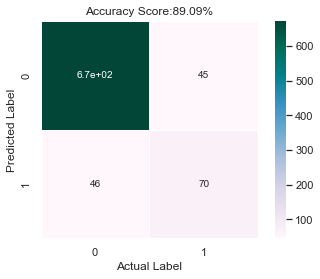

In [75]:
sns.heatmap(confusion_matrix(y_test,y_testpredict),annot=True,cmap='PuBuGn',linewidths=.5,square=True)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Accuracy Score:"+str(round(model1.score(X_test,y_test)*100,2))+'%')
plt.show()

# Comparing the Models

In [76]:
def compare_train_test(models):
    y_trainpredict=model1.predict(X_train)
    y_testpredict=model1.predict(X_test)
    cr_train=classification_report(y_train,y_trainpredict)
    cr_test=classification_report(y_test,y_testpredict)
    print(models.score(X_train,y_train),cr_train,'\n',models.score(X_test,y_test).round(3),cr_test,'\n')
compare_train_test(model1)

1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00       367

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499
 
 0.891               precision    recall  f1-score   support

           0       0.94      0.94      0.94       718
           1       0.61      0.60      0.61       116

    accuracy                           0.89       834
   macro avg       0.77      0.77      0.77       834
weighted avg       0.89      0.89      0.89       834
 



# Random Forest 

In [77]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
y_pred=model.predict(X_test)
print("Accuracy {:.2f}".format(model.score(X_test,y_test)))

Accuracy 0.94


# Performance on Train

In [79]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix
y_train_predict=model.predict(X_train)
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00       367

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499



In [80]:
confusion_matrix(y_train,y_train_predict)

array([[2132,    0],
       [   0,  367]], dtype=int64)

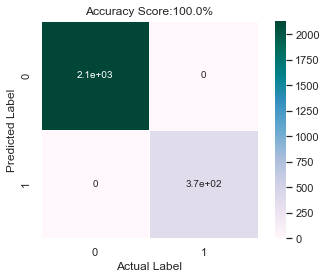

In [81]:
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True,cmap='PuBuGn',linewidths=.5,square=True)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Accuracy Score:"+str(round(model.score(X_train,y_train)*100,2))+'%')
plt.show()

# Performance On Test

In [82]:
y_test_predict=model.predict(X_test)
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       718
           1       0.89      0.64      0.74       116

    accuracy                           0.94       834
   macro avg       0.92      0.81      0.85       834
weighted avg       0.94      0.94      0.93       834



In [83]:
confusion_matrix(y_test,y_test_predict)

array([[709,   9],
       [ 42,  74]], dtype=int64)

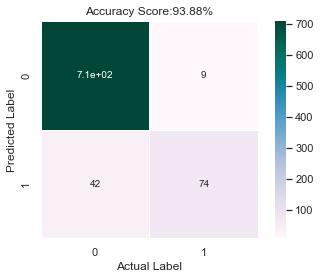

In [84]:
sns.heatmap(confusion_matrix(y_test,y_test_predict),annot=True,cmap='PuBuGn',linewidths=.5,square=True)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Accuracy Score:"+str(round(model.score(X_test,y_test)*100,2))+'%')
plt.show()

# Comparing The Models 

In [85]:
def compare_train_test(models):
    y_trainpredict=model.predict(X_train)
    y_testpredict=model.predict(X_test)
    cr_train=classification_report(y_train,y_trainpredict)
    cr_test=classification_report(y_test,y_testpredict)
    print(models.score(X_train,y_train).round(2),cr_train,'\n',models.score(X_test,y_test).round(2),cr_test,'\n')
compare_train_test(model)

1.0               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00       367

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499
 
 0.94               precision    recall  f1-score   support

           0       0.94      0.99      0.97       718
           1       0.89      0.64      0.74       116

    accuracy                           0.94       834
   macro avg       0.92      0.81      0.85       834
weighted avg       0.94      0.94      0.93       834
 



# ROC Curve Logistic 

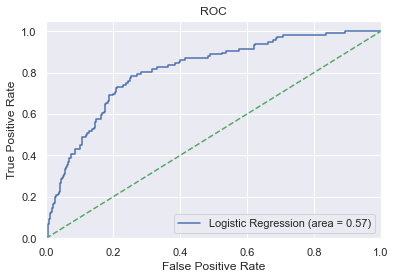

In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC') #Receiver operating characteristic
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# ROC Curve Decision Tree Classifier 

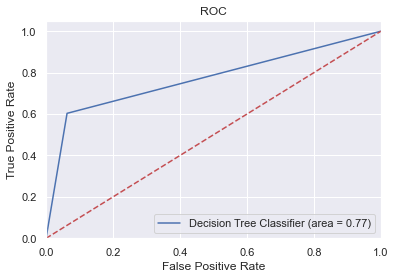

In [87]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC') #Receiver operating characteristic
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# ROC Curve Random Forest Classifier

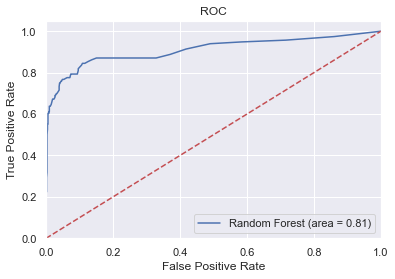

In [88]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC') #Receiver operating characteristic
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

# Comparing all the Models

In [100]:
final=pd.DataFrame({"Models": ["Logistic Regression","Decision Tree","Random Forest"],
                   "Accuracy":[accuracy_score(y_test,y_test_predict),
                               accuracy_score(y_test,y_testpredict),
                              accuracy_score(y_test,y_pred)]})
final

,Models,Accuracy
0,Logistic Regression,0.938849
1,Decision Tree,0.890887
2,Random Forest,0.938849


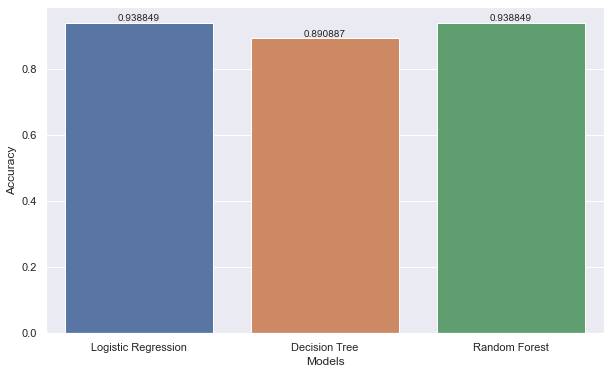

In [101]:
plt.figure(figsize=(10,6))
c=sns.barplot(final['Models'],final['Accuracy'])
for i in c.containers:
    c.bar_label(i)

In [91]:
# Class Imbalance

# we see there is class imbalance here now we balance the data using random over sampler

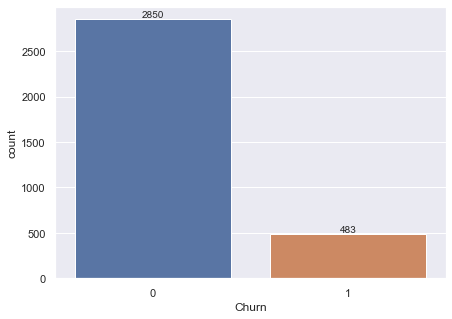

In [92]:
#this is a imbalance
plt.figure(figsize=(7,5))
r=sns.countplot(x='Churn',data=df)
for i in r.containers:
    r.bar_label(i)

In [93]:
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import RandomOverSampler

In [94]:
ros=RandomOverSampler()
X_ros,y_ros=ros.fit_resample(X,y)
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(X_ros,y_ros,test_size=0.25,random_state=1)

In [95]:
y_test_ros.value_counts()

1    720
0    705
Name: Churn, dtype: int64

In [96]:
y_train_ros.value_counts()

0    2145
1    2130
Name: Churn, dtype: int64

In [97]:
from sklearn.linear_model import LogisticRegression
# Decision Tree Classifier
model_ros=model1.fit(X_train_ros,y_train_ros)
model_ros.score(X_test_ros,y_test_ros)

0.9550877192982457

In [98]:
# Random Forest Classifier
model_ros=model.fit(X_train_ros,y_train_ros)
model_ros.score(X_test_ros,y_test_ros)

0.9768421052631578

In [99]:
def newdata(xtest):
    new_data=model.predict(xtest)
    print(new_data)